In [1]:
import pandapower as pp
import pandapower.plotting as plot
import pandas as pd
import warnings

# Suppress warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
# Create empty network
net = pp.create_empty_network()

# Create buses
buses = {}
for i in range(18):
    if i == 0:
        buses[i] = pp.create_bus(net, vn_kv=20.0, name=f"Bus {i}")
    else:
        buses[i] = pp.create_bus(net, vn_kv=0.4, name=f"Bus {i}")

# External grid connection at Bus 0
pp.create_ext_grid(net, bus=buses[0], vm_pu=1.02, name="Grid Connection")

# Transformer between Bus 0 and Bus 1
pp.create_transformer(net, hv_bus=buses[0], lv_bus=buses[1], std_type="0.4 MVA 20/0.4 kV", name="Transformer")

# Create lines
lines = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
    (1, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17)
]
for line in lines:
    pp.create_line(net, from_bus=buses[line[0]], to_bus=buses[line[1]], length_km=0.1, std_type="NAYY 4x50 SE", name=f"Line {line[0]}-{line[1]}")

# Add loads and generators (adjusting the indices to start from Bus 1)
for i in range(1, 18):
    pp.create_load(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"Load {i}")
    pp.create_sgen(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"SGen {i}")


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


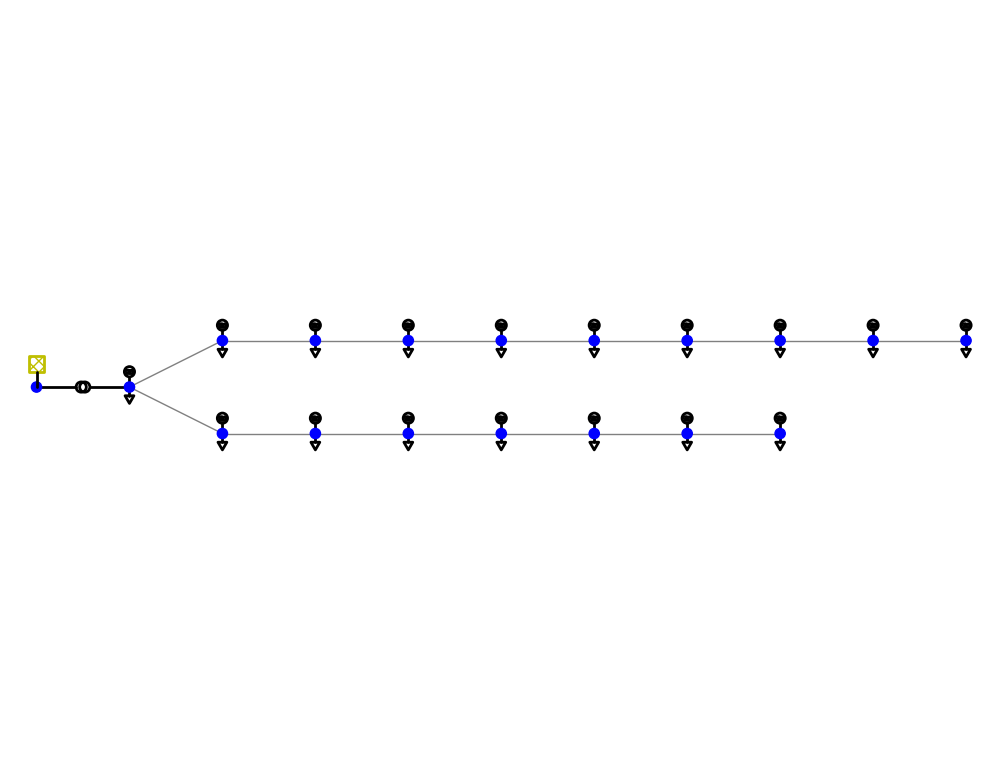

In [3]:
# Plot the network to verify the structure
plot.simple_plot(net, plot_loads=True, plot_sgens=True)

# Load the dataframes from CSV files
gen_data = pd.read_csv("GenerationData_B.csv", index_col=0)
gen_data.columns.name = "household"
load_data = pd.read_csv("LoadData_B.csv", index_col=0)
load_data.columns.name = "household"

<Axes: title={'center': 'Generation Data'}, xlabel='Time of the Day [h]', ylabel='Generation [MW]'>

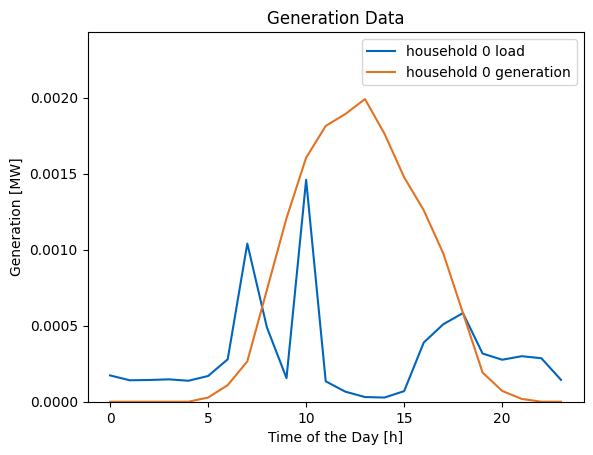

In [4]:
# Verify the shape of data matches the network configuration
assert gen_data.shape[1] == len(net.sgen), "Mismatch between gen_data columns and number of sgen elements"
assert load_data.shape[1] == len(net.load), "Mismatch between load_data columns and number of load elements"

# Plot load data
load_data['10'].plot(legend=True, title="Load Data", xlabel="Time of the Day [h]", ylabel="Load [MW]", ylim=(0, 1.1 * load_data.max().max()), color=(0/255,101/255,189/255), label="household 0 load")

# Plot generation data
gen_data['10'].plot(legend=True, title="Generation Data", xlabel="Time of the Day [h]", ylabel="Generation [MW]", ylim=(0, 1.1 * gen_data.max().max()), color=(227/255,114/255,34/255), label="household 0 generation")


In [6]:
import pandas as pd

# Load CSV data for loads and generations
load_profiles = pd.read_csv("LoadData_C.csv", index_col=0)
generation_profiles = pd.read_csv("GenerationData_C.csv", index_col=0)

# Calculate average generation for each household
average_generation = generation_profiles.mean(axis=0)

# Calculate average load for each household
average_load = load_profiles.mean(axis=0)

# Sort average generation and load in descending order
average_generation_sorted = average_generation.sort_values(ascending=False)
average_load_sorted = average_load.sort_values(ascending=False)

print("Average Generation per Household (Descending Order):")
print(average_generation_sorted)

print("\nAverage Load per Household (Descending Order):")
print(average_load_sorted)

Average Generation per Household (Descending Order):
13    0.000763
12    0.000757
14    0.000743
19    0.000715
11    0.000713
15    0.000693
9     0.000688
20    0.000676
10    0.000666
17    0.000654
26    0.000648
16    0.000620
25    0.000547
24    0.000506
2     0.000490
3     0.000473
4     0.000448
18    0.000435
21    0.000410
8     0.000371
0     0.000367
5     0.000329
7     0.000329
1     0.000279
6     0.000262
22    0.000242
23    0.000144
dtype: float64

Average Load per Household (Descending Order):
26    0.000838
13    0.000595
6     0.000529
19    0.000527
4     0.000502
2     0.000431
0     0.000430
18    0.000397
14    0.000377
25    0.000371
15    0.000366
20    0.000358
8     0.000358
23    0.000357
7     0.000357
5     0.000356
16    0.000349
17    0.000331
10    0.000311
12    0.000294
21    0.000290
24    0.000285
11    0.000271
1     0.000268
3     0.000254
22    0.000251
9     0.000250
dtype: float64


In [6]:
# import pandas as pd
# import pandapower as pp
# import random
# import numpy as np
# from utils import run_time_series  # Ensure this is adapted to handle DataFrame inputs directly

# # Load CSV data for loads and generations
# load_profiles = pd.read_csv("LoadData_B.csv", index_col=0)
# load_profiles.columns.name = "household"
# generation_profiles = pd.read_csv("GenerationData_B.csv", index_col=0)
# generation_profiles.columns.name = "household"

# def create_network():
#     # Create empty network
#     net = pp.create_empty_network()

#     # Create buses
#     buses = {}
#     for i in range(18):
#         if i == 0:
#             buses[i] = pp.create_bus(net, vn_kv=20.0, name=f"Bus {i}")
#         else:
#             buses[i] = pp.create_bus(net, vn_kv=0.4, name=f"Bus {i}")

#     # External grid connection at Bus 0
#     pp.create_ext_grid(net, bus=buses[0], vm_pu=1.02, name="Grid Connection")

#     # Transformer between Bus 0 and Bus 1
#     pp.create_transformer(net, hv_bus=buses[0], lv_bus=buses[1], std_type="0.4 MVA 20/0.4 kV", name="Transformer")

#     # Create lines
#     lines = [
#         (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
#         (1, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17)
#     ]
#     for line in lines:
#         pp.create_line(net, from_bus=buses[line[0]], to_bus=buses[line[1]], length_km=0.1, std_type="NAYY 4x50 SE", name=f"Line {line[0]}-{line[1]}")

#     # Add loads and generators (adjusting the indices to start from Bus 1)
#     for i in range(1, 18):
#         pp.create_load(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"Load {i}")
#         pp.create_sgen(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"SGen {i}")
#     return net
# # Create the network
# net = create_network()

# # Assigning load_data and gen_data globally for use in the fitness function
# load_data = load_profiles
# gen_data = generation_profiles

# # Define the fitness function
# def calculate_total_line_loading(load_order, gen_order):
#     num_loads = len(load_data.columns)
#     num_gens = len(gen_data.columns)

#     # Ensure correct lengths
#     assert len(load_order) == num_loads, f"Length mismatch: {len(load_order)} != {num_loads}"
#     assert len(gen_order) == num_gens, f"Length mismatch: {len(gen_order)} != {num_gens}"

#     # Run the time series simulation
#     res_ext, res_lines = run_time_series(
#         gen_data,
#         load_data,
#         net,
#         index_order_load=load_order,
#         index_order_gen=gen_order,
#     )

#     # Calculate total line loading and check constraints
#     total_line_loading = res_lines.max(axis=1).sum()
#     all_within_limits = all(res_lines.max(axis=1) <= 100)

#     return total_line_loading if all_within_limits else float('inf')

# # Generate initial solution
# def generate_initial_solution():
#     middle_load_indices = random.sample([i for i in range(17) if i not in [6, 3, 11]], 14)
#     load_indices = [6] + middle_load_indices + [3, 11]
    
#     middle_gen_indices = random.sample([i for i in range(17) if i not in [13, 1, 6]], 14)
#     gen_indices = [13] + middle_gen_indices + [1, 6]
    
#     return load_indices, gen_indices

# # Generate neighboring solution
# def generate_neighbor(load_order, gen_order):
#     # Swap one pair of elements in the middle part of load_order
#     neighbor_load = load_order[:]
#     middle_load_indices = list(range(1, len(load_order) - 2))
#     idx1, idx2 = random.sample(middle_load_indices, 2)
#     neighbor_load[idx1], neighbor_load[idx2] = neighbor_load[idx2], neighbor_load[idx1]
    
#     # Swap one pair of elements in the middle part of gen_order
#     neighbor_gen = gen_order[:]
#     middle_gen_indices = list(range(1, len(gen_order) - 2))
#     idx1, idx2 = random.sample(middle_gen_indices, 2)
#     neighbor_gen[idx1], neighbor_gen[idx2] = neighbor_gen[idx2], neighbor_gen[idx1]
    
#     return neighbor_load, neighbor_gen

# # Acceptance probability function
# def acceptance_probability(old_cost, new_cost, temperature):
#     if new_cost < old_cost:
#         return 1.0
#     else:
#         return np.exp((old_cost - new_cost) / temperature)

# # Temperature schedule function
# def temperature_schedule(t, alpha=0.95):
#     return t * alpha

# # Simulated Annealing Algorithm with smarter swapping logic
# def simulated_annealing(initial_load, initial_gen, initial_temp, alpha, max_iter):
#     current_load = initial_load
#     current_gen = initial_gen
#     current_cost = calculate_total_line_loading(current_load, current_gen)
    
#     best_load = current_load
#     best_gen = current_gen
#     best_cost = current_cost
    
#     temperature = initial_temp
    
#     for iteration in range(max_iter):
#         neighbor_load, neighbor_gen = generate_neighbor(current_load, current_gen)
#         neighbor_cost = calculate_total_line_loading(neighbor_load, neighbor_gen)
        
#         if neighbor_cost < current_cost:
#             current_load = neighbor_load
#             current_gen = neighbor_gen
#             current_cost = neighbor_cost
#         else:
#             neighbor_load, neighbor_gen = generate_neighbor(current_load, current_gen)  # Try another swap
        
#         if current_cost < best_cost:
#             best_load = current_load
#             best_gen = current_gen
#             best_cost = current_cost
        
#         temperature = temperature_schedule(temperature, alpha)
        
#         # Print the desired information at each step
#         print(f"Iteration {iteration + 1}/{max_iter}, Current Cost: {current_cost}, Best Cost: {best_cost}, Temperature: {temperature}")
#         print(f"Load Order: {current_load}")
#         print(f"Gen Order: {current_gen}")
    
#     return best_load, best_gen, best_cost

# # Function to attempt multiple combinations and analyze positive modifications
# def optimize_with_multiple_attempts(num_attempts, initial_temp, alpha, max_iter):
#     best_solution = None
#     best_cost = float('inf')
    
#     for attempt in range(num_attempts):
#         print(f"\nAttempt {attempt + 1}/{num_attempts}:")
        
#         # Generate initial solution for this attempt
#         initial_load, initial_gen = generate_initial_solution()
        
#         # Run simulated annealing
#         current_load, current_gen, current_cost = simulated_annealing(initial_load, initial_gen, initial_temp, alpha, max_iter)
        
#         # Update best solution if found a better one in this attempt
#         if current_cost < best_cost:
#             best_solution = (current_load, current_gen)
#             best_cost = current_cost
    
#     return best_solution, best_cost

# # Set parameters for optimization
# num_attempts = 4
# initial_temp = 1000
# alpha = 0.95
# max_iter = 40

# # Run optimization with multiple attempts
# best_solution, best_cost = optimize_with_multiple_attempts(num_attempts, initial_temp, alpha, max_iter)

# # Print best solution
# best_load, best_gen = best_solution
# print("\nBest Total Line Loading:", best_cost)
# print("Best Order Load:", best_load)
# print("Best Order Gen:", best_gen)

# # Save the best order to CSV for evaluation
# Group_Letter = 'Z'  # change this to your group letter
# df_save = pd.DataFrame({'generation_order': best_gen, 'load_order': best_load})
# df_save.to_csv(f'Group_{Group_Letter}_Assignment_2_Data_Set_C_order.csv', index=False)

# # Load again to check if it is correct
# df = pd.read_csv(f'Group_{Group_Letter}_Assignment_2_Data_Set_C_order.csv')
# your_gen_order_loaded = df['generation_order'].values
# your_load_order_loaded = df['load_order'].values

# # Ensure the orders match
# assert (list(best_gen) == list(your_gen_order_loaded)), "Generation order mismatch!"
# assert (list(best_load) == list(your_load_order_loaded)), "Load order mismatch!"

# # Evaluate the results
# res_ext, res_lines = run_time_series(gen_data, load_data, net, best_gen, best_load, results_suffix="evaluation")
# assert all(res_lines.max(axis=1) <= 100.0), "Line loading exceeds limit!"
# print("Total Line Loading for Evaluation:", res_lines.max(axis=1).sum()) 



Attempt 1/4:


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.01it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 112.32it/s]


Iteration 1/40, Current Cost: 92.55297284353934, Best Cost: 92.55297284353934, Temperature: 950.0
Load Order: [6, 16, 5, 15, 4, 12, 9, 14, 10, 13, 8, 7, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 11, 4, 7, 14, 9, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 88.05it/s]


Iteration 2/40, Current Cost: 92.55297284353934, Best Cost: 92.55297284353934, Temperature: 902.5
Load Order: [6, 16, 5, 15, 4, 12, 9, 14, 10, 13, 8, 7, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 11, 4, 7, 14, 9, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 80.53it/s]


Iteration 3/40, Current Cost: 92.55297284353934, Best Cost: 92.55297284353934, Temperature: 857.375
Load Order: [6, 16, 5, 15, 4, 12, 9, 14, 10, 13, 8, 7, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 11, 4, 7, 14, 9, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 70.11it/s]


Iteration 4/40, Current Cost: 92.55297284353934, Best Cost: 92.55297284353934, Temperature: 814.5062499999999
Load Order: [6, 16, 5, 15, 4, 12, 9, 14, 10, 13, 8, 7, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 11, 4, 7, 14, 9, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 62.94it/s]


Iteration 5/40, Current Cost: 90.97171274249803, Best Cost: 90.97171274249803, Temperature: 773.7809374999998
Load Order: [6, 16, 5, 15, 12, 4, 9, 14, 10, 13, 8, 7, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 4, 11, 7, 14, 9, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 58.54it/s]


Iteration 6/40, Current Cost: 90.97171274249803, Best Cost: 90.97171274249803, Temperature: 735.0918906249998
Load Order: [6, 16, 5, 15, 12, 4, 9, 14, 10, 13, 8, 7, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 4, 11, 7, 14, 9, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 50.41it/s]


Iteration 7/40, Current Cost: 90.89303289159017, Best Cost: 90.89303289159017, Temperature: 698.3372960937497
Load Order: [6, 16, 7, 15, 12, 4, 9, 14, 10, 13, 8, 5, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 51.25it/s]


Iteration 8/40, Current Cost: 90.89303289159017, Best Cost: 90.89303289159017, Temperature: 663.4204312890622
Load Order: [6, 16, 7, 15, 12, 4, 9, 14, 10, 13, 8, 5, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 44.60it/s]


Iteration 9/40, Current Cost: 90.89303289159017, Best Cost: 90.89303289159017, Temperature: 630.2494097246091
Load Order: [6, 16, 7, 15, 12, 4, 9, 14, 10, 13, 8, 5, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 41.64it/s]


Iteration 10/40, Current Cost: 90.89303289159017, Best Cost: 90.89303289159017, Temperature: 598.7369392383787
Load Order: [6, 16, 7, 15, 12, 4, 9, 14, 10, 13, 8, 5, 0, 2, 1, 3, 11]
Gen Order: [13, 15, 10, 12, 16, 0, 8, 2, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 37.39it/s]


Iteration 11/40, Current Cost: 90.87391727007373, Best Cost: 90.87391727007373, Temperature: 568.8000922764597
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 5, 0, 2, 1, 3, 11]
Gen Order: [13, 12, 10, 15, 16, 0, 8, 2, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 29.85it/s]


Iteration 12/40, Current Cost: 90.87391727007373, Best Cost: 90.87391727007373, Temperature: 540.3600876626367
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 5, 0, 2, 1, 3, 11]
Gen Order: [13, 12, 10, 15, 16, 0, 8, 2, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.96it/s]


Iteration 13/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 513.3420832795049
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 28.06it/s]


Iteration 14/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 487.6749791155296
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.13it/s]


Iteration 15/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 463.29123015975307
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 26.38it/s]


Iteration 16/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 440.1266686517654
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.74it/s]


Iteration 17/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 418.1203352191771
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.23it/s]


Iteration 18/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 397.2143184582182
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.14it/s]


Iteration 19/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 377.3536025353073
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 24.39it/s]


Iteration 20/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 358.4859224085419
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.64it/s]


Iteration 21/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 340.5616262881148
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.00it/s]


Iteration 22/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 323.533544973709
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.46it/s]


Iteration 23/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 307.35686772502356
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.75it/s]


Iteration 24/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 291.98902433877237
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 22.12it/s]


Iteration 25/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 277.38957312183373
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.87it/s]


Iteration 26/40, Current Cost: 90.50476775506363, Best Cost: 90.50476775506363, Temperature: 263.52009446574203
Load Order: [6, 15, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 0, 5, 1, 3, 11]
Gen Order: [13, 12, 10, 2, 16, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.88it/s]


Iteration 27/40, Current Cost: 89.83259772657743, Best Cost: 89.83259772657743, Temperature: 250.3440897424549
Load Order: [6, 0, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 12, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.09it/s]


Iteration 28/40, Current Cost: 89.83259772657743, Best Cost: 89.83259772657743, Temperature: 237.82688525533214
Load Order: [6, 0, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 12, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.47it/s]


Iteration 29/40, Current Cost: 89.83259772657743, Best Cost: 89.83259772657743, Temperature: 225.93554099256554
Load Order: [6, 0, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 12, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.25it/s]


Iteration 30/40, Current Cost: 89.83259772657743, Best Cost: 89.83259772657743, Temperature: 214.63876394293726
Load Order: [6, 0, 7, 16, 12, 4, 9, 14, 10, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 12, 0, 8, 15, 3, 5, 4, 11, 9, 14, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.49it/s]


Iteration 31/40, Current Cost: 89.8306866718349, Best Cost: 89.8306866718349, Temperature: 203.9068257457904
Load Order: [6, 0, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 14, 0, 8, 15, 3, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.64it/s]


Iteration 32/40, Current Cost: 89.8306866718349, Best Cost: 89.8306866718349, Temperature: 193.71148445850088
Load Order: [6, 0, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 14, 0, 8, 15, 3, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.54it/s]


Iteration 33/40, Current Cost: 89.8306866718349, Best Cost: 89.8306866718349, Temperature: 184.02591023557582
Load Order: [6, 0, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 14, 0, 8, 15, 3, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.32it/s]


Iteration 34/40, Current Cost: 89.8306866718349, Best Cost: 89.8306866718349, Temperature: 174.82461472379703
Load Order: [6, 0, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 14, 0, 8, 15, 3, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.83it/s]


Iteration 35/40, Current Cost: 89.8306866718349, Best Cost: 89.8306866718349, Temperature: 166.08338398760716
Load Order: [6, 0, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 5, 1, 3, 11]
Gen Order: [13, 16, 10, 2, 14, 0, 8, 15, 3, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.81it/s]


Iteration 36/40, Current Cost: 88.42428293444051, Best Cost: 88.42428293444051, Temperature: 157.7792147882268
Load Order: [6, 5, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 0, 1, 3, 11]
Gen Order: [13, 16, 3, 2, 14, 0, 8, 15, 10, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.48it/s]


Iteration 37/40, Current Cost: 88.42428293444051, Best Cost: 88.42428293444051, Temperature: 149.89025404881545
Load Order: [6, 5, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 0, 1, 3, 11]
Gen Order: [13, 16, 3, 2, 14, 0, 8, 15, 10, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.38it/s]


Iteration 38/40, Current Cost: 88.42428293444051, Best Cost: 88.42428293444051, Temperature: 142.39574134637468
Load Order: [6, 5, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 0, 1, 3, 11]
Gen Order: [13, 16, 3, 2, 14, 0, 8, 15, 10, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.21it/s]


Iteration 39/40, Current Cost: 88.42428293444051, Best Cost: 88.42428293444051, Temperature: 135.27595427905592
Load Order: [6, 5, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 0, 1, 3, 11]
Gen Order: [13, 16, 3, 2, 14, 0, 8, 15, 10, 5, 4, 11, 9, 12, 7, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.68it/s]


Iteration 40/40, Current Cost: 88.42428293444051, Best Cost: 88.42428293444051, Temperature: 128.5121565651031
Load Order: [6, 5, 7, 10, 12, 4, 9, 14, 16, 13, 8, 2, 15, 0, 1, 3, 11]
Gen Order: [13, 16, 3, 2, 14, 0, 8, 15, 10, 5, 4, 11, 9, 12, 7, 1, 6]

Attempt 2/4:


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.12it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.87it/s]


Iteration 1/40, Current Cost: 97.5758751049345, Best Cost: 97.5758751049345, Temperature: 950.0
Load Order: [6, 8, 15, 4, 1, 0, 9, 7, 14, 13, 5, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 0, 9, 4, 2, 5, 8, 7, 16, 12, 11, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.69it/s]


Iteration 2/40, Current Cost: 97.5758751049345, Best Cost: 97.5758751049345, Temperature: 902.5
Load Order: [6, 8, 15, 4, 1, 0, 9, 7, 14, 13, 5, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 0, 9, 4, 2, 5, 8, 7, 16, 12, 11, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.77it/s]


Iteration 3/40, Current Cost: 97.5758751049345, Best Cost: 97.5758751049345, Temperature: 857.375
Load Order: [6, 8, 15, 4, 1, 0, 9, 7, 14, 13, 5, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 0, 9, 4, 2, 5, 8, 7, 16, 12, 11, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.99it/s]


Iteration 4/40, Current Cost: 97.5758751049345, Best Cost: 97.5758751049345, Temperature: 814.5062499999999
Load Order: [6, 8, 15, 4, 1, 0, 9, 7, 14, 13, 5, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 0, 9, 4, 2, 5, 8, 7, 16, 12, 11, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.91it/s]


Iteration 5/40, Current Cost: 97.5758751049345, Best Cost: 97.5758751049345, Temperature: 773.7809374999998
Load Order: [6, 8, 15, 4, 1, 0, 9, 7, 14, 13, 5, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 0, 9, 4, 2, 5, 8, 7, 16, 12, 11, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.16it/s]


Iteration 6/40, Current Cost: 96.95773639956985, Best Cost: 96.95773639956985, Temperature: 735.0918906249998
Load Order: [6, 8, 5, 4, 1, 0, 9, 7, 14, 13, 15, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 4, 2, 5, 8, 7, 16, 0, 11, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.18it/s]


Iteration 7/40, Current Cost: 93.872110662421, Best Cost: 93.872110662421, Temperature: 698.3372960937497
Load Order: [6, 8, 5, 4, 15, 0, 9, 7, 14, 13, 1, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 11, 2, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.18it/s]


Iteration 8/40, Current Cost: 93.872110662421, Best Cost: 93.872110662421, Temperature: 663.4204312890622
Load Order: [6, 8, 5, 4, 15, 0, 9, 7, 14, 13, 1, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 11, 2, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.74it/s]


Iteration 9/40, Current Cost: 93.872110662421, Best Cost: 93.872110662421, Temperature: 630.2494097246091
Load Order: [6, 8, 5, 4, 15, 0, 9, 7, 14, 13, 1, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 11, 2, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.48it/s]


Iteration 10/40, Current Cost: 93.872110662421, Best Cost: 93.872110662421, Temperature: 598.7369392383787
Load Order: [6, 8, 5, 4, 15, 0, 9, 7, 14, 13, 1, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 11, 2, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.62it/s]


Iteration 11/40, Current Cost: 93.872110662421, Best Cost: 93.872110662421, Temperature: 568.8000922764597
Load Order: [6, 8, 5, 4, 15, 0, 9, 7, 14, 13, 1, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 11, 2, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.10it/s]


Iteration 12/40, Current Cost: 93.872110662421, Best Cost: 93.872110662421, Temperature: 540.3600876626367
Load Order: [6, 8, 5, 4, 15, 0, 9, 7, 14, 13, 1, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 11, 2, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.29it/s]


Iteration 13/40, Current Cost: 93.872110662421, Best Cost: 93.872110662421, Temperature: 513.3420832795049
Load Order: [6, 8, 5, 4, 15, 0, 9, 7, 14, 13, 1, 10, 2, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 9, 11, 2, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.59it/s]


Iteration 14/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 487.6749791155296
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.48it/s]


Iteration 15/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 463.29123015975307
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.59it/s]


Iteration 16/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 440.1266686517654
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.38it/s]


Iteration 17/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 418.1203352191771
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.28it/s]


Iteration 18/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 397.2143184582182
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.10it/s]


Iteration 19/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 377.3536025353073
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.65it/s]


Iteration 20/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 358.4859224085419
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.78it/s]


Iteration 21/40, Current Cost: 92.77486933162419, Best Cost: 92.77486933162419, Temperature: 340.5616262881148
Load Order: [6, 8, 5, 4, 15, 0, 2, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 5, 8, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.53it/s]


Iteration 22/40, Current Cost: 92.09433941130645, Best Cost: 92.09433941130645, Temperature: 323.533544973709
Load Order: [6, 8, 5, 4, 2, 0, 15, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 8, 5, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.86it/s]


Iteration 23/40, Current Cost: 92.09433941130645, Best Cost: 92.09433941130645, Temperature: 307.35686772502356
Load Order: [6, 8, 5, 4, 2, 0, 15, 7, 14, 13, 1, 10, 9, 16, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 8, 5, 7, 16, 0, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.78it/s]


Iteration 24/40, Current Cost: 91.81762522774932, Best Cost: 91.81762522774932, Temperature: 291.98902433877237
Load Order: [6, 8, 5, 16, 2, 0, 15, 7, 14, 13, 1, 10, 9, 4, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 8, 0, 7, 16, 5, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.28it/s]


Iteration 25/40, Current Cost: 91.81762522774932, Best Cost: 91.81762522774932, Temperature: 277.38957312183373
Load Order: [6, 8, 5, 16, 2, 0, 15, 7, 14, 13, 1, 10, 9, 4, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 8, 0, 7, 16, 5, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.16it/s]


Iteration 26/40, Current Cost: 91.81762522774932, Best Cost: 91.81762522774932, Temperature: 263.52009446574203
Load Order: [6, 8, 5, 16, 2, 0, 15, 7, 14, 13, 1, 10, 9, 4, 12, 3, 11]
Gen Order: [13, 10, 12, 2, 11, 9, 8, 0, 7, 16, 5, 4, 3, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.17it/s]


Iteration 27/40, Current Cost: 91.81541378681429, Best Cost: 91.81541378681429, Temperature: 250.3440897424549
Load Order: [6, 8, 5, 16, 2, 0, 15, 7, 14, 13, 1, 12, 9, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 9, 8, 0, 7, 16, 5, 4, 12, 14, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.73it/s]


Iteration 28/40, Current Cost: 91.74938389621178, Best Cost: 91.74938389621178, Temperature: 237.82688525533214
Load Order: [6, 8, 5, 16, 2, 0, 9, 7, 14, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 14, 8, 0, 7, 16, 5, 4, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.64it/s]


Iteration 29/40, Current Cost: 91.51334355379035, Best Cost: 91.51334355379035, Temperature: 225.93554099256554
Load Order: [6, 8, 5, 14, 2, 0, 9, 7, 16, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 16, 8, 0, 7, 14, 5, 4, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.38it/s]


Iteration 30/40, Current Cost: 91.51334355379035, Best Cost: 91.51334355379035, Temperature: 214.63876394293726
Load Order: [6, 8, 5, 14, 2, 0, 9, 7, 16, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 16, 8, 0, 7, 14, 5, 4, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.31it/s]


Iteration 31/40, Current Cost: 91.51334355379035, Best Cost: 91.51334355379035, Temperature: 203.9068257457904
Load Order: [6, 8, 5, 14, 2, 0, 9, 7, 16, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 16, 8, 0, 7, 14, 5, 4, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.26it/s]


Iteration 32/40, Current Cost: 91.51334355379035, Best Cost: 91.51334355379035, Temperature: 193.71148445850088
Load Order: [6, 8, 5, 14, 2, 0, 9, 7, 16, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 16, 8, 0, 7, 14, 5, 4, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.20it/s]


Iteration 33/40, Current Cost: 91.51334355379035, Best Cost: 91.51334355379035, Temperature: 184.02591023557582
Load Order: [6, 8, 5, 14, 2, 0, 9, 7, 16, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 16, 8, 0, 7, 14, 5, 4, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.87it/s]


Iteration 34/40, Current Cost: 91.51334355379035, Best Cost: 91.51334355379035, Temperature: 174.82461472379703
Load Order: [6, 8, 5, 14, 2, 0, 9, 7, 16, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 10, 3, 2, 11, 16, 8, 0, 7, 14, 5, 4, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.58it/s]


Iteration 35/40, Current Cost: 90.52950935266239, Best Cost: 90.52950935266239, Temperature: 166.08338398760716
Load Order: [6, 2, 5, 14, 8, 0, 9, 7, 16, 13, 1, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 4, 3, 2, 11, 16, 8, 0, 7, 14, 5, 10, 12, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.86it/s]


Iteration 36/40, Current Cost: 89.42742756810358, Best Cost: 89.42742756810358, Temperature: 157.7792147882268
Load Order: [6, 2, 5, 14, 8, 1, 9, 7, 16, 13, 0, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 4, 3, 2, 11, 16, 8, 12, 7, 14, 5, 10, 0, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.99it/s]


Iteration 37/40, Current Cost: 89.42742756810358, Best Cost: 89.42742756810358, Temperature: 149.89025404881545
Load Order: [6, 2, 5, 14, 8, 1, 9, 7, 16, 13, 0, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 4, 3, 2, 11, 16, 8, 12, 7, 14, 5, 10, 0, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.68it/s]


Iteration 38/40, Current Cost: 89.42742756810358, Best Cost: 89.42742756810358, Temperature: 142.39574134637468
Load Order: [6, 2, 5, 14, 8, 1, 9, 7, 16, 13, 0, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 4, 3, 2, 11, 16, 8, 12, 7, 14, 5, 10, 0, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.59it/s]


Iteration 39/40, Current Cost: 89.42742756810358, Best Cost: 89.42742756810358, Temperature: 135.27595427905592
Load Order: [6, 2, 5, 14, 8, 1, 9, 7, 16, 13, 0, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 4, 3, 2, 11, 16, 8, 12, 7, 14, 5, 10, 0, 9, 15, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.35it/s]


Iteration 40/40, Current Cost: 89.42742756810358, Best Cost: 89.42742756810358, Temperature: 128.5121565651031
Load Order: [6, 2, 5, 14, 8, 1, 9, 7, 16, 13, 0, 12, 15, 4, 10, 3, 11]
Gen Order: [13, 4, 3, 2, 11, 16, 8, 12, 7, 14, 5, 10, 0, 9, 15, 1, 6]

Attempt 3/4:


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.33it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.34it/s]


Iteration 1/40, Current Cost: 94.97046865352465, Best Cost: 94.97046865352465, Temperature: 950.0
Load Order: [6, 16, 15, 4, 9, 0, 5, 1, 8, 14, 7, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 12, 9, 10, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.98it/s]


Iteration 2/40, Current Cost: 94.97046865352465, Best Cost: 94.97046865352465, Temperature: 902.5
Load Order: [6, 16, 15, 4, 9, 0, 5, 1, 8, 14, 7, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 12, 9, 10, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.51it/s]


Iteration 3/40, Current Cost: 93.90826065447443, Best Cost: 93.90826065447443, Temperature: 857.375
Load Order: [6, 16, 15, 4, 9, 8, 5, 1, 0, 14, 7, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 10, 9, 12, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.90it/s]


Iteration 4/40, Current Cost: 92.1154196921214, Best Cost: 92.1154196921214, Temperature: 814.5062499999999
Load Order: [6, 16, 15, 4, 9, 8, 5, 1, 7, 14, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 10, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.66it/s]


Iteration 5/40, Current Cost: 92.1154196921214, Best Cost: 92.1154196921214, Temperature: 773.7809374999998
Load Order: [6, 16, 15, 4, 9, 8, 5, 1, 7, 14, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 10, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.52it/s]


Iteration 6/40, Current Cost: 92.1154196921214, Best Cost: 92.1154196921214, Temperature: 735.0918906249998
Load Order: [6, 16, 15, 4, 9, 8, 5, 1, 7, 14, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 10, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.72it/s]


Iteration 7/40, Current Cost: 92.1154196921214, Best Cost: 92.1154196921214, Temperature: 698.3372960937497
Load Order: [6, 16, 15, 4, 9, 8, 5, 1, 7, 14, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 10, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.69it/s]


Iteration 8/40, Current Cost: 92.1154196921214, Best Cost: 92.1154196921214, Temperature: 663.4204312890622
Load Order: [6, 16, 15, 4, 9, 8, 5, 1, 7, 14, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 10, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.56it/s]


Iteration 9/40, Current Cost: 92.1154196921214, Best Cost: 92.1154196921214, Temperature: 630.2494097246091
Load Order: [6, 16, 15, 4, 9, 8, 5, 1, 7, 14, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 8, 3, 10, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.98it/s]


Iteration 10/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 598.7369392383787
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.08it/s]


Iteration 11/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 568.8000922764597
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.47it/s]


Iteration 12/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 540.3600876626367
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.41it/s]


Iteration 13/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 513.3420832795049
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.35it/s]


Iteration 14/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 487.6749791155296
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.24it/s]


Iteration 15/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 463.29123015975307
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.20it/s]


Iteration 16/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 440.1266686517654
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.17it/s]


Iteration 17/40, Current Cost: 92.1011546288342, Best Cost: 92.1011546288342, Temperature: 418.1203352191771
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 7, 16, 0, 13, 2, 12, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 12, 9, 15, 0, 11, 14, 4, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.98it/s]


Iteration 18/40, Current Cost: 90.7409106339152, Best Cost: 90.7409106339152, Temperature: 397.2143184582182
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 12, 16, 0, 13, 2, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 4, 9, 15, 0, 11, 14, 12, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.87it/s]


Iteration 19/40, Current Cost: 90.7409106339152, Best Cost: 90.7409106339152, Temperature: 377.3536025353073
Load Order: [6, 14, 15, 4, 9, 8, 5, 1, 12, 16, 0, 13, 2, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 4, 9, 15, 0, 11, 14, 12, 7, 2, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.85it/s]


Iteration 20/40, Current Cost: 88.82138577749845, Best Cost: 88.82138577749845, Temperature: 358.4859224085419
Load Order: [6, 14, 15, 4, 9, 8, 2, 1, 12, 16, 0, 13, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 3, 8, 4, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.00it/s]


Iteration 21/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 340.5616262881148
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.84it/s]


Iteration 22/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 323.533544973709
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.77it/s]


Iteration 23/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 307.35686772502356
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.28it/s]


Iteration 24/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 291.98902433877237
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.64it/s]


Iteration 25/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 277.38957312183373
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.44it/s]


Iteration 26/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 263.52009446574203
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.09it/s]


Iteration 27/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 250.3440897424549
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.28it/s]


Iteration 28/40, Current Cost: 86.65327138592465, Best Cost: 86.65327138592465, Temperature: 237.82688525533214
Load Order: [6, 14, 15, 4, 9, 8, 2, 13, 12, 16, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 16, 5, 10, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.90it/s]


Iteration 29/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 225.93554099256554
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.18it/s]


Iteration 30/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 214.63876394293726
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.17it/s]


Iteration 31/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 203.9068257457904
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.29it/s]


Iteration 32/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 193.71148445850088
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.30it/s]


Iteration 33/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 184.02591023557582
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.29it/s]


Iteration 34/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 174.82461472379703
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.16it/s]


Iteration 35/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 166.08338398760716
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.22it/s]


Iteration 36/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 157.7792147882268
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.03it/s]


Iteration 37/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 149.89025404881545
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.91it/s]


Iteration 38/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 142.39574134637468
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.08it/s]


Iteration 39/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 135.27595427905592
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.09it/s]


Iteration 40/40, Current Cost: 85.5842560018804, Best Cost: 85.5842560018804, Temperature: 128.5121565651031
Load Order: [6, 14, 15, 4, 16, 8, 2, 13, 12, 9, 0, 1, 5, 7, 10, 3, 11]
Gen Order: [13, 10, 5, 16, 4, 8, 3, 9, 15, 0, 2, 14, 12, 7, 11, 1, 6]

Attempt 4/4:


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.93it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.96it/s]


Iteration 1/40, Current Cost: 98.53795645776655, Best Cost: 98.53795645776655, Temperature: 950.0
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 15, 13, 0, 10, 16, 4, 3, 11]
Gen Order: [13, 11, 4, 16, 10, 14, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.89it/s]


Iteration 2/40, Current Cost: 98.53795645776655, Best Cost: 98.53795645776655, Temperature: 902.5
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 15, 13, 0, 10, 16, 4, 3, 11]
Gen Order: [13, 11, 4, 16, 10, 14, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.69it/s]


Iteration 3/40, Current Cost: 98.53795645776655, Best Cost: 98.53795645776655, Temperature: 857.375
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 15, 13, 0, 10, 16, 4, 3, 11]
Gen Order: [13, 11, 4, 16, 10, 14, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.52it/s]


Iteration 4/40, Current Cost: 92.71649697022266, Best Cost: 92.71649697022266, Temperature: 814.5062499999999
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 16, 13, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.83it/s]


Iteration 5/40, Current Cost: 92.71649697022266, Best Cost: 92.71649697022266, Temperature: 773.7809374999998
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 16, 13, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.69it/s]


Iteration 6/40, Current Cost: 92.71649697022266, Best Cost: 92.71649697022266, Temperature: 735.0918906249998
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 16, 13, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.68it/s]


Iteration 7/40, Current Cost: 92.71649697022266, Best Cost: 92.71649697022266, Temperature: 698.3372960937497
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 16, 13, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.69it/s]


Iteration 8/40, Current Cost: 92.71649697022266, Best Cost: 92.71649697022266, Temperature: 663.4204312890622
Load Order: [6, 2, 1, 8, 5, 14, 7, 9, 12, 16, 13, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 9, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.58it/s]


Iteration 9/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 630.2494097246091
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.65it/s]


Iteration 10/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 598.7369392383787
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.61it/s]


Iteration 11/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 568.8000922764597
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.13it/s]


Iteration 12/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 540.3600876626367
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.41it/s]


Iteration 13/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 513.3420832795049
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.16it/s]


Iteration 14/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 487.6749791155296
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.12it/s]


Iteration 15/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 463.29123015975307
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.39it/s]


Iteration 16/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 440.1266686517654
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.36it/s]


Iteration 17/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 418.1203352191771
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.41it/s]


Iteration 18/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 397.2143184582182
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.21it/s]


Iteration 19/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 377.3536025353073
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.21it/s]


Iteration 20/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 358.4859224085419
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.33it/s]


Iteration 21/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 340.5616262881148
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.19it/s]


Iteration 22/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 323.533544973709
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.20it/s]


Iteration 23/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 307.35686772502356
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.15it/s]


Iteration 24/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 291.98902433877237
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.07it/s]


Iteration 25/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 277.38957312183373
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.37it/s]


Iteration 26/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 263.52009446574203
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.91it/s]


Iteration 27/40, Current Cost: 90.56570383631956, Best Cost: 90.56570383631956, Temperature: 250.3440897424549
Load Order: [6, 2, 1, 8, 13, 14, 7, 9, 12, 16, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 12, 2, 8, 15, 14, 7, 0, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.90it/s]


Iteration 28/40, Current Cost: 87.67042167639133, Best Cost: 87.67042167639133, Temperature: 237.82688525533214
Load Order: [6, 2, 1, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 14, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.84it/s]


Iteration 29/40, Current Cost: 87.67042167639133, Best Cost: 87.67042167639133, Temperature: 225.93554099256554
Load Order: [6, 2, 1, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 15, 4, 3, 11]
Gen Order: [13, 9, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 14, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.78it/s]


Iteration 30/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 214.63876394293726
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.01it/s]


Iteration 31/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 203.9068257457904
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.87it/s]


Iteration 32/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 193.71148445850088
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.92it/s]


Iteration 33/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 184.02591023557582
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.27it/s]


Iteration 34/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 174.82461472379703
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.88it/s]


Iteration 35/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 166.08338398760716
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.79it/s]


Iteration 36/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 157.7792147882268
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.84it/s]


Iteration 37/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 149.89025404881545
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.78it/s]


Iteration 38/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 142.39574134637468
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.73it/s]


Iteration 39/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 135.27595427905592
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.77it/s]


Iteration 40/40, Current Cost: 85.31648063405079, Best Cost: 85.31648063405079, Temperature: 128.5121565651031
Load Order: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Gen Order: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]

Best Total Line Loading: 85.31648063405079
Best Order Load: [6, 2, 15, 8, 13, 14, 16, 9, 12, 7, 5, 0, 10, 1, 4, 3, 11]
Best Order Gen: [13, 14, 4, 16, 10, 11, 3, 5, 0, 2, 8, 15, 9, 7, 12, 1, 6]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.60it/s]


Total Line Loading for Evaluation: 84.89157457527818


In [3]:
import pandapower as pp
import pandapower.plotting as plot 
def create_network():
    # Create empty network
    net = pp.create_empty_network()

    # Create buses
    buses = {}
    for i in range(28):
        if i == 0:
            buses[i] = pp.create_bus(net, vn_kv=20.0, name=f"Bus {i}")
        else:
            buses[i] = pp.create_bus(net, vn_kv=0.4, name=f"Bus {i}")

    # External grid connection at Bus 0
    pp.create_ext_grid(net, bus=buses[0], vm_pu=1.02, name="Grid Connection")

    # Transformer between Bus 0 and Bus 1
    pp.create_transformer(net, hv_bus=buses[0], lv_bus=buses[1], std_type="0.4 MVA 20/0.4 kV", name="Transformer")

    # Create lines
    lines = [
        (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
        (1, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17),
        (1, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27)
    ]
    for line in lines:
        pp.create_line(net, from_bus=buses[line[0]], to_bus=buses[line[1]], length_km=0.1, std_type="NAYY 4x50 SE", name=f"Line {line[0]}-{line[1]}")

    # Add loads and generators (adjusting the indices to start from Bus 1)
    for i in range(1, 28):
        pp.create_load(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"Load {i}")
        pp.create_sgen(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"SGen {i}")

    return net

# Create the network
net = create_network()


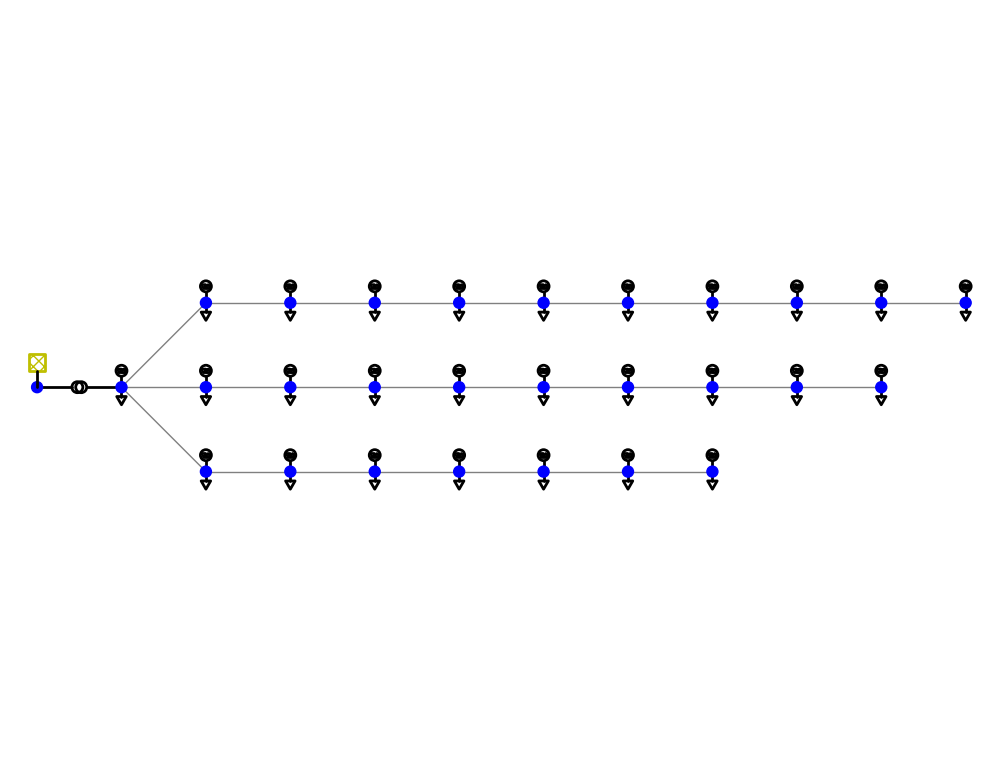

<Axes: >

In [5]:
plot.simple_plot(net, plot_loads=True, plot_sgens=True)


In [ ]:
import pandas as pd
import pandapower as pp
import random
import numpy as np
import time
from utils import run_time_series  # Ensure this is adapted to handle DataFrame inputs directly

# Load CSV data for loads and generations
load_profiles = pd.read_csv("LoadData_C.csv", index_col=0)
load_profiles.columns.name = "household"
generation_profiles = pd.read_csv("GenerationData_C.csv", index_col=0)
generation_profiles.columns.name = "household"

# Define the network creation function
def create_network():
    # Create empty network
    net = pp.create_empty_network()

    # Create buses
    buses = {}
    for i in range(28):
        if i == 0:
            buses[i] = pp.create_bus(net, vn_kv=20.0, name=f"Bus {i}")
        else:
            buses[i] = pp.create_bus(net, vn_kv=0.4, name=f"Bus {i}")

    # External grid connection at Bus 0
    pp.create_ext_grid(net, bus=buses[0], vm_pu=1.02, name="Grid Connection")

    # Transformer between Bus 0 and Bus 1
    pp.create_transformer(net, hv_bus=buses[0], lv_bus=buses[1], std_type="0.4 MVA 20/0.4 kV", name="Transformer")

    # Create lines
    lines = [
        (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
        (1, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17),
        (1, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27)
    ]
    for line in lines:
        pp.create_line(net, from_bus=buses[line[0]], to_bus=buses[line[1]], length_km=0.1, std_type="NAYY 4x50 SE", name=f"Line {line[0]}-{line[1]}")

    # Add loads and generators (adjusting the indices to start from Bus 1)
    for i in range(1, 28):
        pp.create_load(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"Load {i}")
        pp.create_sgen(net, bus=buses[i], p_mw=0.01, q_mvar=0.005, name=f"SGen {i}")

    return net

# Create the network
net = create_network()

# Assigning load_data and gen_data globally for use in the fitness function
load_data = load_profiles
gen_data = generation_profiles

# Define the fitness function
def calculate_total_line_loading(load_order, gen_order):
    num_loads = len(load_data.columns)
    num_gens = len(gen_data.columns)

    # Ensure correct lengths
    assert len(load_order) == num_loads, f"Length mismatch: {len(load_order)} != {num_loads}"
    assert len(gen_order) == num_gens, f"Length mismatch: {len(gen_order)} != {num_gens}"

    # Run the time series simulation
    res_ext, res_lines = run_time_series(
        gen_data,
        load_data,
        net,
        index_order_load=load_order,
        index_order_gen=gen_order,
    )

    # Calculate total line loading and check constraints
    total_line_loading = res_lines.max(axis=1).sum()
    all_within_limits = all(res_lines.max(axis=1) <= 100)

    return total_line_loading if all_within_limits else float('inf')

# Generate initial solution
def generate_initial_solution():
    middle_load_indices = random.sample([i for i in range(27) if i not in [9, 26]], 25)
    load_indices = [9] + middle_load_indices + [26]
    
    middle_gen_indices = random.sample([i for i in range(27) if i not in [13, 23]], 25)
    gen_indices = [13] + middle_gen_indices + [23]
    
    return load_indices, gen_indices

# Generate neighboring solution
def generate_neighbor(load_order, gen_order):
    # Swap one pair of elements in the middle part of load_order
    neighbor_load = load_order[:]
    middle_load_indices = list(range(1, len(load_order) - 2))
    idx1, idx2 = random.sample(middle_load_indices, 2)
    neighbor_load[idx1], neighbor_load[idx2] = neighbor_load[idx2], neighbor_load[idx1]
    
    # Swap one pair of elements in the middle part of gen_order
    neighbor_gen = gen_order[:]
    middle_gen_indices = list(range(1, len(gen_order) - 2))
    idx1, idx2 = random.sample(middle_gen_indices, 2)
    neighbor_gen[idx1], neighbor_gen[idx2] = neighbor_gen[idx2], neighbor_gen[idx1]
    
    return neighbor_load, neighbor_gen

# Acceptance probability function
def acceptance_probability(old_cost, new_cost, temperature):
    if new_cost < old_cost:
        return 1.0
    else:
        return np.exp((old_cost - new_cost) / temperature)

# Temperature schedule function
def temperature_schedule(t, alpha=0.95):
    return t * alpha

# Simulated Annealing Algorithm with smarter swapping logic
def simulated_annealing(initial_load, initial_gen, initial_temp, alpha, max_iter):
    current_load = initial_load
    current_gen = initial_gen
    current_cost = calculate_total_line_loading(current_load, current_gen)
    
    best_load = current_load
    best_gen = current_gen
    best_cost = current_cost
    
    temperature = initial_temp
    
    for iteration in range(max_iter):
        neighbor_load, neighbor_gen = generate_neighbor(current_load, current_gen)
        neighbor_cost = calculate_total_line_loading(neighbor_load, neighbor_gen)
        
        if acceptance_probability(current_cost, neighbor_cost, temperature) > random.random():
            current_load = neighbor_load
            current_gen = neighbor_gen
            current_cost = neighbor_cost
        
        if current_cost < best_cost:
            best_load = current_load
            best_gen = current_gen
            best_cost = current_cost
        
        temperature = temperature_schedule(temperature, alpha)
        
        print(f"Iteration {iteration + 1}/{max_iter}, Current Cost: {current_cost}, Best Cost: {best_cost}, Temperature: {temperature}")
        print(f"Load Order: {current_load}")
        print(f"Gen Order: {current_gen}")
    
    return best_load, best_gen, best_cost

# Function to attempt multiple combinations and analyze positive modifications
def optimize_with_multiple_attempts(num_attempts, initial_temp, alpha, max_iter):
    best_solution = None
    best_cost = float('inf')
    
    for attempt in range(num_attempts):
        print(f"\nAttempt {attempt + 1}/{num_attempts}:")
        
        # Generate initial solution for this attempt
        initial_load, initial_gen = generate_initial_solution()
        
        # Run simulated annealing
        current_load, current_gen, current_cost = simulated_annealing(initial_load, initial_gen, initial_temp, alpha, max_iter)
        
        # Update best solution if found a better one in this attempt
        if current_cost < best_cost:
            best_solution = (current_load, current_gen)
            best_cost = current_cost
    
    return best_solution, best_cost

# Set parameters for optimization
num_attempts = 3
initial_temp = 1000
alpha = 0.95
max_iter = 50

# Measure computational time
start_time = time.time()

# Run optimization with multiple attempts
best_solution, best_cost = optimize_with_multiple_attempts(num_attempts, initial_temp, alpha, max_iter)

# Calculate the total computational time
end_time = time.time()
computational_time = end_time - start_time

print(f"\nTotal Computational Time for Simulated Annealing: {computational_time:.2f} seconds")

# Print best solution
best_load, best_gen = best_solution
print("\nBest Total Line Loading:", best_cost)
print("Best Order Load:", best_load)
print("Best Order Gen:", best_gen)

# Save the best order to CSV for evaluation
Group_Letter = 'Z'  # change this to your group letter
df_save = pd.DataFrame({'generation_order': best_gen, 'load_order': best_load})
df_save.to_csv(f'Group_{Group_Letter}_Assignment_2_Data_Set_C_order.csv', index=False)

# Load again to check if it is correct
df = pd.read_csv(f'Group_{Group_Letter}_Assignment_2_Data_Set_C_order.csv')
your_gen_order_loaded = df['generation_order'].values
your_load_order_loaded = df['load_order'].values

# Ensure the orders match
assert (list(best_gen) == list(your_gen_order_loaded)), "Generation order mismatch!"
assert (list(best_load) == list(your_load_order_loaded)), "Load order mismatch!"

# Re-create network to ensure clean state for evaluation
net, buses = create_network()

# Evaluate the results
res_ext, res_lines = run_time_series(gen_data, load_data, net, best_gen, best_load, results_suffix="evaluation")
assert all(res_lines.max(axis=1) <= 100.0), "Line loading exceeds limit!"
print("Total Line Loading for Evaluation:", res_lines.max(axis=1).sum())



Attempt 1/3:


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.24it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 108.11it/s]


Iteration 1/50, Current Cost: 114.02432677879636, Best Cost: 113.89851263033388, Temperature: 950.0
Load Order: [9, 21, 16, 10, 20, 0, 24, 18, 25, 3, 8, 13, 15, 22, 12, 4, 6, 1, 2, 11, 5, 7, 17, 23, 19, 14, 26]
Gen Order: [13, 3, 12, 0, 25, 11, 15, 22, 19, 20, 18, 10, 24, 26, 5, 4, 1, 17, 8, 6, 16, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 93.41it/s]


Iteration 2/50, Current Cost: 114.22729038292351, Best Cost: 113.89851263033388, Temperature: 902.5
Load Order: [9, 21, 16, 10, 20, 0, 24, 18, 8, 3, 25, 13, 15, 22, 12, 4, 6, 1, 2, 11, 5, 7, 17, 23, 19, 14, 26]
Gen Order: [13, 3, 16, 0, 25, 11, 15, 22, 19, 20, 18, 10, 24, 26, 5, 4, 1, 17, 8, 6, 12, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 83.28it/s]


Iteration 3/50, Current Cost: 113.65023589963465, Best Cost: 113.65023589963465, Temperature: 857.375
Load Order: [9, 21, 0, 10, 20, 16, 24, 18, 8, 3, 25, 13, 15, 22, 12, 4, 6, 1, 2, 11, 5, 7, 17, 23, 19, 14, 26]
Gen Order: [13, 3, 16, 0, 25, 11, 15, 22, 19, 20, 18, 10, 24, 26, 5, 8, 1, 17, 4, 6, 12, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 68.53it/s]


Iteration 4/50, Current Cost: 112.13133494700733, Best Cost: 112.13133494700733, Temperature: 814.5062499999999
Load Order: [9, 21, 7, 10, 20, 16, 24, 18, 8, 3, 25, 13, 15, 22, 12, 4, 6, 1, 2, 11, 5, 0, 17, 23, 19, 14, 26]
Gen Order: [13, 3, 16, 0, 25, 11, 15, 22, 19, 20, 18, 10, 12, 26, 5, 8, 1, 17, 4, 6, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 58.58it/s]


Iteration 5/50, Current Cost: 120.05859890325351, Best Cost: 112.13133494700733, Temperature: 773.7809374999998
Load Order: [9, 21, 7, 10, 20, 16, 24, 4, 8, 3, 25, 13, 15, 22, 12, 18, 6, 1, 2, 11, 5, 0, 17, 23, 19, 14, 26]
Gen Order: [13, 3, 16, 0, 25, 11, 15, 5, 19, 20, 18, 10, 12, 26, 22, 8, 1, 17, 4, 6, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 66.57it/s]


Iteration 6/50, Current Cost: 120.05864570985707, Best Cost: 112.13133494700733, Temperature: 735.0918906249998
Load Order: [9, 21, 7, 10, 20, 16, 24, 4, 8, 3, 25, 6, 15, 22, 12, 18, 13, 1, 2, 11, 5, 0, 17, 23, 19, 14, 26]
Gen Order: [13, 3, 16, 0, 25, 8, 15, 5, 19, 20, 18, 10, 12, 26, 22, 11, 1, 17, 4, 6, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 59.50it/s]


Iteration 7/50, Current Cost: 117.21786521292275, Best Cost: 112.13133494700733, Temperature: 698.3372960937497
Load Order: [9, 21, 7, 10, 20, 16, 24, 4, 8, 3, 1, 6, 15, 22, 12, 18, 13, 25, 2, 11, 5, 0, 17, 23, 19, 14, 26]
Gen Order: [13, 3, 22, 0, 25, 8, 15, 5, 19, 20, 18, 10, 12, 26, 16, 11, 1, 17, 4, 6, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 56.35it/s]


Iteration 8/50, Current Cost: 115.44296664007325, Best Cost: 112.13133494700733, Temperature: 663.4204312890622
Load Order: [9, 21, 7, 10, 20, 16, 24, 17, 8, 3, 1, 6, 15, 22, 12, 18, 13, 25, 2, 11, 5, 0, 4, 23, 19, 14, 26]
Gen Order: [13, 3, 22, 0, 25, 8, 15, 5, 19, 20, 18, 10, 12, 26, 1, 11, 16, 17, 4, 6, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 51.78it/s]


Iteration 9/50, Current Cost: 113.8684956581718, Best Cost: 112.13133494700733, Temperature: 630.2494097246091
Load Order: [9, 21, 7, 10, 20, 16, 24, 17, 8, 3, 1, 6, 15, 22, 12, 18, 13, 25, 2, 11, 5, 0, 19, 23, 4, 14, 26]
Gen Order: [13, 3, 22, 0, 25, 8, 15, 5, 19, 20, 18, 10, 6, 26, 1, 11, 16, 17, 4, 12, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 47.23it/s]


Iteration 10/50, Current Cost: 112.31191580840473, Best Cost: 112.13133494700733, Temperature: 598.7369392383787
Load Order: [9, 21, 7, 10, 20, 16, 24, 17, 8, 3, 1, 6, 15, 22, 12, 18, 25, 13, 2, 11, 5, 0, 19, 23, 4, 14, 26]
Gen Order: [13, 1, 22, 0, 25, 8, 15, 5, 19, 20, 18, 10, 6, 26, 3, 11, 16, 17, 4, 12, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 43.81it/s]


Iteration 11/50, Current Cost: 113.14563842952187, Best Cost: 112.13133494700733, Temperature: 568.8000922764597
Load Order: [9, 21, 7, 10, 20, 16, 24, 17, 8, 3, 1, 6, 15, 23, 12, 18, 25, 13, 2, 11, 5, 0, 19, 22, 4, 14, 26]
Gen Order: [13, 10, 22, 0, 25, 8, 15, 5, 19, 20, 18, 1, 6, 26, 3, 11, 16, 17, 4, 12, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 39.73it/s]


Iteration 12/50, Current Cost: 113.4440884216004, Best Cost: 112.13133494700733, Temperature: 540.3600876626367
Load Order: [9, 21, 7, 10, 20, 16, 24, 17, 8, 3, 1, 6, 15, 23, 12, 18, 25, 13, 5, 11, 2, 0, 19, 22, 4, 14, 26]
Gen Order: [13, 10, 22, 0, 25, 8, 15, 5, 19, 20, 18, 1, 6, 26, 3, 4, 16, 17, 11, 12, 24, 14, 7, 9, 21, 2, 23]


No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 18/24 [00:00<00:00, 40.73it/s]